### Download example image

In [1]:
# !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1LPP7qp6WGdXh8igyPJ2fQZ42zDq7WGus' -O NAGAP_94V3_194.tif

### Define detected principal point and fiducial marker coordinates
- For image `NAGAP_94V3_194.tif`, as identified with template matching routine illustrated in `nagap_multi_image_example/multi_image_notebook.ipynb`

In [2]:
# Listed in (y,x) coordinate order, as per OpenCV convention

principal_point     = (5856.4375, 6639.90625)

midside_left        = (5881.5, 1041.125)
midside_top         = (257.25, 6615.125)
midside_right       = (5831.125, 12238.375)
midside_bottom      = (11455.625, 6665.0)

corner_top_left     = (381.375, 1116.0)
corner_top_right    = (333.5, 12114.5)
corner_bottom_right = (11331.125, 12163.375)
corner_bottom_left  = (11380.0, 1165.75)

In [3]:
fiducial_coordinates = [midside_left,
                        midside_top,
                        midside_right,
                        midside_bottom,
                        corner_top_left,
                        corner_top_right,
                        corner_bottom_right,
                        corner_bottom_left]

### Define true fiducial marker coordinates
- Computed using detected principal coordinates (listed above) and measured calibrated distances from principal point. See calibration report Report_OSL_1785.pdf

In [4]:
scanning_resolution_mm       = 0.02  

In [5]:
# Fiducial Marker 5
midside_left_dist_pp_true_x         = -111.998 / scanning_resolution_mm
midside_left_dist_pp_true_y         = -0.004 / scanning_resolution_mm

# Fiducial Marker 7
midside_top_dist_pp_true_x          = 0.014 / scanning_resolution_mm
midside_top_dist_pp_true_y          = 111.993 / scanning_resolution_mm

# Fiducial Marker 6
midside_right_dist_pp_true_x        = 112.004 / scanning_resolution_mm
midside_right_dist_pp_true_y        = 0.000 / scanning_resolution_mm

# Fiducial Marker 8
midside_bottom_dist_pp_true_x       = 0.000 / scanning_resolution_mm
midside_bottom_dist_pp_true_y       = -112.002 / scanning_resolution_mm

# Fiducial Marker 3
corner_top_left_dist_pp_true_x      = -109.989 / scanning_resolution_mm
corner_top_left_dist_pp_true_y      = 109.995 / scanning_resolution_mm

# Fiducial Marker 2
corner_top_right_dist_pp_true_x     = 110.010 / scanning_resolution_mm
corner_top_right_dist_pp_true_y     = 109.999 / scanning_resolution_mm

# Fiducial Marker 4
corner_bottom_right_dist_pp_true_x  = 109.998 / scanning_resolution_mm
corner_bottom_right_dist_pp_true_y  = -110.002 / scanning_resolution_mm

# Fiducial Marker 1
corner_bottom_left_dist_pp_true_x   = -109.990 / scanning_resolution_mm
corner_bottom_left_dist_pp_true_y   = -110.002 / scanning_resolution_mm

In [6]:
principal_point_x = principal_point[1]
principal_point_y = principal_point[0]

In [7]:
midside_left_true        = (principal_point_y - midside_left_dist_pp_true_y, 
                            principal_point_x + midside_left_dist_pp_true_x)

midside_top_true         = (principal_point_y - midside_top_dist_pp_true_y, 
                            principal_point_x + midside_top_dist_pp_true_x) 

midside_right_true       = (principal_point_y - midside_right_dist_pp_true_y, 
                            principal_point_x + midside_right_dist_pp_true_x)  

midside_bottom_true      = (principal_point_y - midside_bottom_dist_pp_true_y, 
                            principal_point_x + midside_bottom_dist_pp_true_x)

corner_top_left_true     = (principal_point_y - corner_top_left_dist_pp_true_y, 
                            principal_point_x + corner_top_left_dist_pp_true_x)

corner_top_right_true    = (principal_point_y - corner_top_right_dist_pp_true_y, 
                            principal_point_x + corner_top_right_dist_pp_true_x)  

corner_bottom_right_true = (principal_point_y - corner_bottom_right_dist_pp_true_y, 
                            principal_point_x + corner_bottom_right_dist_pp_true_x)

corner_bottom_left_true  = (principal_point_y - corner_bottom_left_dist_pp_true_y, 
                            principal_point_x + corner_bottom_left_dist_pp_true_x)

In [8]:
fiducial_coordinates_true = [midside_left_true,
                             midside_top_true,
                             midside_right_true,
                             midside_bottom_true,
                             corner_top_left_true,
                             corner_top_right_true,
                             corner_bottom_right_true,
                             corner_bottom_left_true]

### Image Restitution

In [9]:
import numpy as np
import cv2
from skimage import transform as tf
import matplotlib.pyplot as plt

In [10]:
fiducial_coordinates = np.array(fiducial_coordinates, dtype=float)
fiducial_coordinates_true = np.array(fiducial_coordinates_true, dtype=float)

In [11]:
image_array = cv2.imread('NAGAP_94V3_194.tif', cv2.IMREAD_GRAYSCALE)
output_dim = image_array.shape

In [12]:
tform = tf.AffineTransform()
tform.estimate(fiducial_coordinates, fiducial_coordinates_true)

image_array_transformed = tf.warp(image_array, tform, output_shape=output_dim)
image_array_transformed = (image_array_transformed*255).astype(np.uint8)

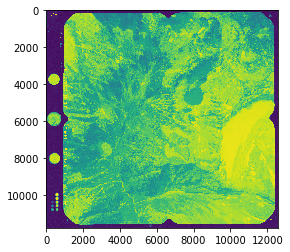

In [13]:
plt.imshow(image_array)

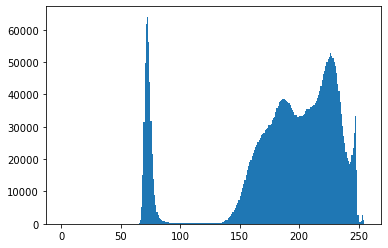

In [14]:
n, bins, patches = plt.hist(image_array.ravel()[::40],
                            bins=256, 
                            range=(0,256))

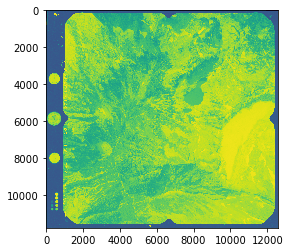

In [15]:
plt.imshow(image_array_transformed)

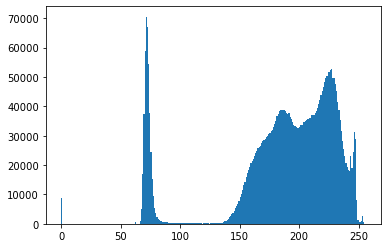

In [16]:
n, bins, patches = plt.hist(image_array_transformed.ravel()[::40],
                            bins=256, 
                            range=(0,256))